In [4]:
#!/usr/bin/Rscript

if (!require("pacman")) install.packages("pacman")
pacman::p_load(ggplot2, sqldf, tidyr, stringr, dplyr, doBy, plyr)
RESEARCH_HOME = Sys.getenv(c("RESEARCH_HOME"))
PATH = "Scripts/Python/data/"
SAVE_PDF = F
W = 6
H = 6
muDefault      = 5
deltaDefault   = 6
epsilonDefault = 100

ml  = read.csv(paste0(RESEARCH_HOME, PATH, 'ml_delta.csv'), header = F, sep = ";")
bfe = read.csv(paste0(RESEARCH_HOME, PATH, 'bfe_delta.csv'), header = F, sep = ";")

data = rbind(ml, bfe)
names(data) = c("runID", "Method", "Epsilon", "Mu", "Delta", "Time")
data$Epsilon = as.numeric(as.character(data$Epsilon))
data$Mu      = as.numeric(as.character(data$Mu))
data$Delta   = as.numeric(as.character(data$Delta))
data$Time    = as.numeric(as.character(data$Time))


In [5]:
head(data[order(data$Delta), ])
nrow(data)

,runID,Method,Epsilon,Mu,Delta,Time
1,0,MergeLast,100,5,3,1049.356
6,5,MergeLast,100,5,3,923.694
11,10,MergeLast,100,5,3,900.313
16,15,MergeLast,100,5,3,930.730
21,20,MergeLast,100,5,3,897.761
26,10,bfe,100,5,3,511.290


[1] 40

In [6]:
df = summaryBy(data=data, Time ~ Epsilon + Mu + Delta + Method, FUN = function(x){ c(m=mean(x),s=sd(x))})
df

Epsilon,Mu,Delta,Method,Time.m,Time.s
100,5,3,MergeLast,940.3708,62.588052
100,5,3,bfe,503.4633,9.722316
100,5,4,MergeLast,1080.6382,98.498204
100,5,4,bfe,560.2400,2.617995
100,5,5,MergeLast,781.7752,21.978053
100,5,5,bfe,637.8133,15.643741
100,5,6,MergeLast,738.8366,20.640264
100,5,6,bfe,723.6067,2.532634
100,5,7,MergeLast,651.3324,20.194442
100,5,7,bfe,786.2967,17.823542


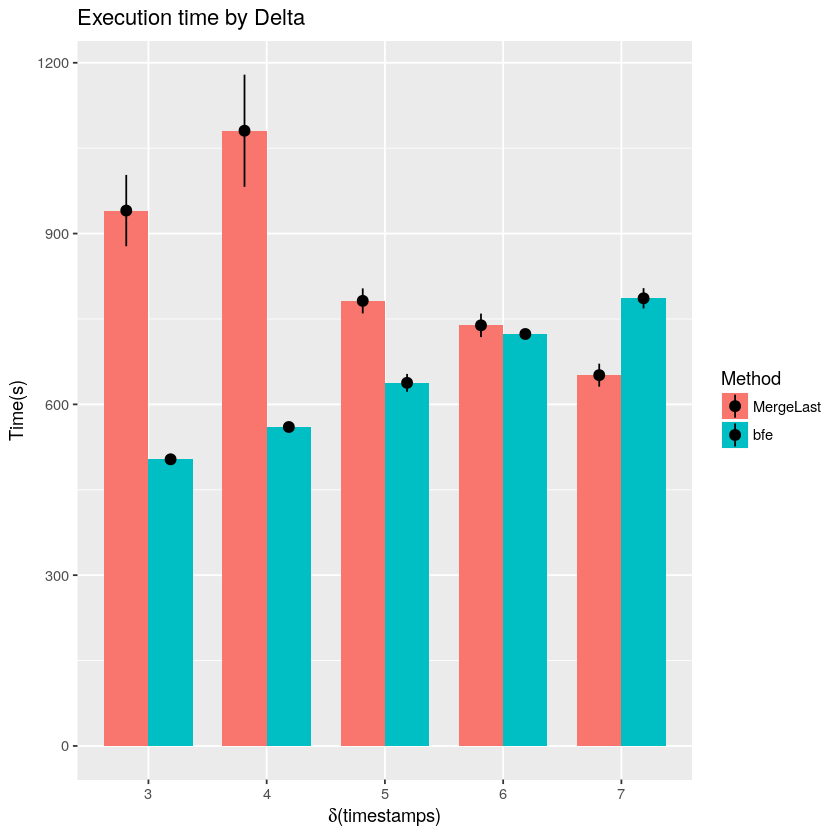

In [8]:
title = "Execution time by Delta"
g = ggplot(data=df, aes(x=factor(Delta), y=Time.m, fill=Method, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(delta,"(timestamps)"))) 
plot(g)

In [9]:
st = read.csv(paste0(RESEARCH_HOME, PATH, 'ml_delta_stages.csv'), header = F, sep = ";")

names(st)  = c("runID", "n", "Method", "Epsilon", "Mu", "Delta", "Stage", "Time")
st$Epsilon = as.numeric(as.character(st$Epsilon))
st$Mu      = as.numeric(as.character(st$Mu))
st$Delta   = as.numeric(as.character(st$Delta))
st$Time    = as.numeric(as.character(st$Time))
st = st[, c("runID", "Stage", "Epsilon", "Mu", "Delta", "Time")]


In [10]:
st_s = summaryBy(data=st, Time ~ Epsilon + Mu + Delta + Stage, FUN = function(x){ c(m=mean(x),s=sd(x))})
st_s

Epsilon,Mu,Delta,Stage,Time.m,Time.s
100,5,3,0.Reporting locations,4.854333,0.3283053
100,5,3,1.Set of disks for t_i,9.222444,17.9482857
100,5,3,2.Set of disks for t_i+delta,46.991111,7.4354997
100,5,3,3.Joining timestams,17.564667,1.3286589
100,5,3,4.Checking internals,16.669111,4.3270517
100,5,3,Running MergeLast,940.370000,62.5907098
100,5,4,0.Reporting locations,9.032625,3.3197883
100,5,4,1.Set of disks for t_i,18.046500,24.0361860
100,5,4,2.Set of disks for t_i+delta,53.093250,7.6888022
100,5,4,3.Joining timestams,19.018750,2.1086539


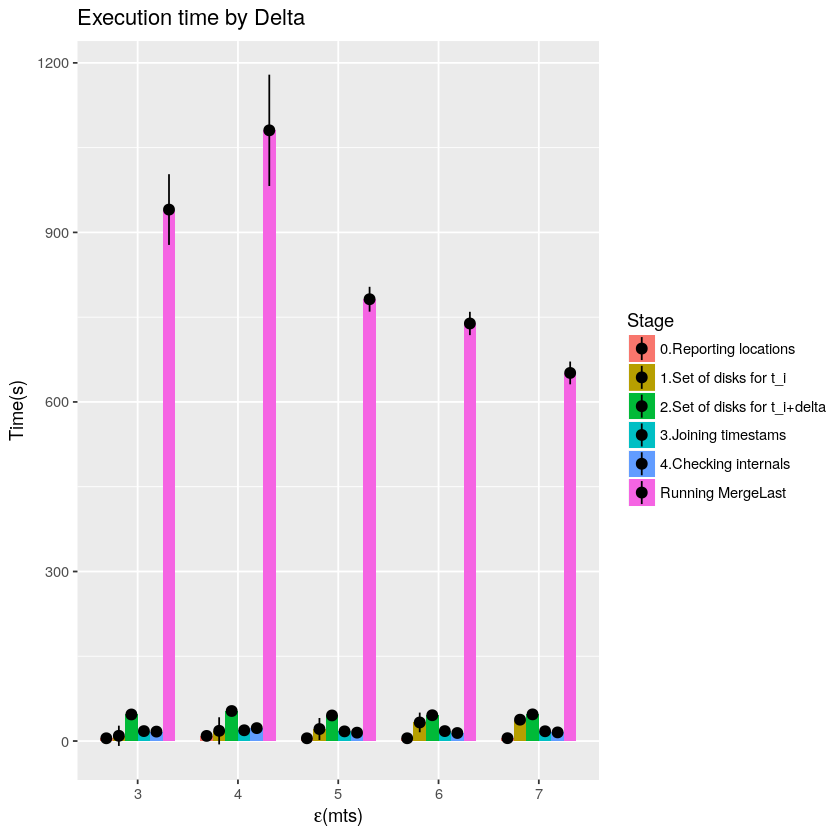

In [11]:
title = "Execution time by Delta"
g = ggplot(data=st_s, aes(x=factor(Delta), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)

In [12]:
mdf = read.csv(paste0(RESEARCH_HOME, PATH, 'ml_delta_mdf.csv'), header = F, sep = ";")

names(mdf)  = c("mdfID", "n", "runID", "Stage", "Epsilon", "Mu", "Delta", "Time", "Load", "Timestamp")
mdf$Epsilon   = as.numeric(as.character(mdf$Epsilon))
mdf$Mu        = as.numeric(as.character(mdf$Mu))
mdf$Delta     = as.numeric(as.character(mdf$Delta))
mdf$Time      = as.numeric(as.character(mdf$Time))
mdf$Load      = as.numeric(as.character(mdf$Load))
mdf$Timestamp = as.numeric(as.character(mdf$Timestamp))

mdf_s = summaryBy(data=mdf, Time ~ Epsilon + Mu + Delta + Stage, FUN = function(x){ c(m=mean(x),s=sd(x))})
mdf_s

Epsilon,Mu,Delta,Stage,Time.m,Time.s
100,5,3,A.Indexing points...,6.8330545,1.43067758
100,5,3,B.Getting pairs...,9.4193818,2.53297173
100,5,3,C.Computing centers...,1.6598182,0.30351119
100,5,3,D.Indexing centers...,1.4409818,0.20249348
100,5,3,E.Getting disks...,7.8956182,1.33007575
100,5,3,F.Filtering less-than-mu disks...,0.6766364,0.15264609
100,5,3,G.Prunning duplicate candidates...,3.1966182,0.55020271
100,5,3,H.Indexing candidates...,3.6289818,0.57519734
100,5,3,I.Getting expansions...,0.3337636,0.07991963
100,5,3,J.Finding maximal disks...,11.2512364,7.00870731


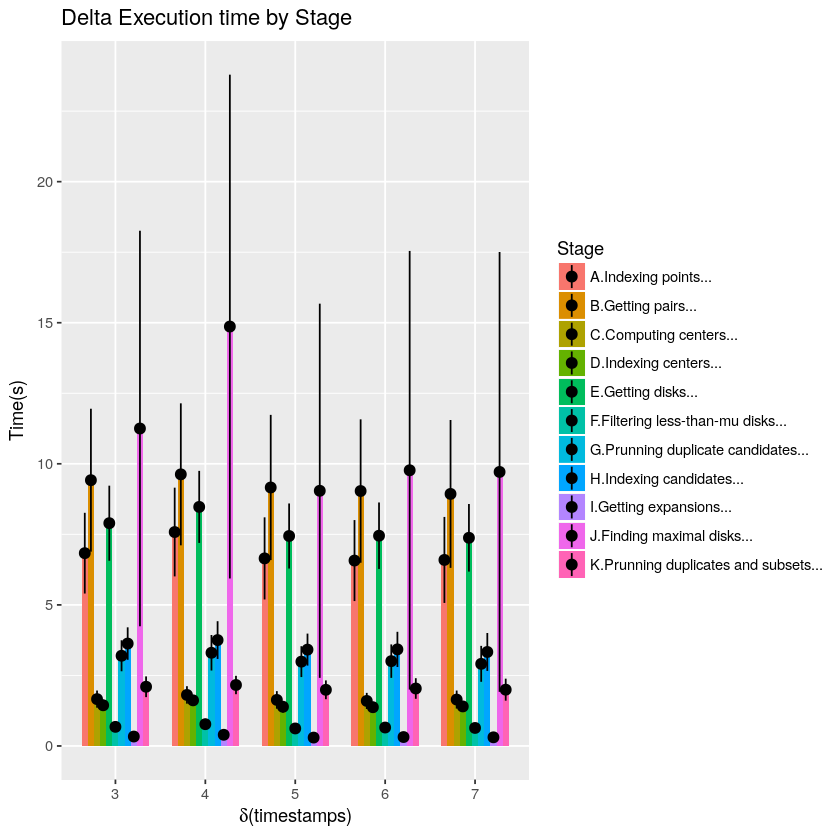

In [15]:
title = "Delta Execution time by Stage"
g = ggplot(data=mdf_s, aes(x=factor(Delta), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(delta,"(timestamps)"))) 
plot(g)

In [16]:
mdf_4 = mdf[mdf$Delta == 4 & (mdf$Stage == "H.Indexing candidates..." | mdf$Stage == "J.Finding maximal disks..."), ]
mdf_4

data = sqldf("SELECT mdfID, Timestamp, MAX(Time) AS Time, MAX(Load) AS Load FROM mdf_4 GROUP BY mdfID, Timestamp")


,mdfID,n,runID,Stage,Epsilon,Mu,Delta,Time,Load,Timestamp
129,11,1269,1,H.Indexing candidates...,100,5,4,4.628,13241,0
131,11,1271,1,J.Finding maximal disks...,100,5,4,22.175,2060,0
140,12,1286,1,H.Indexing candidates...,100,5,4,4.439,13906,3
142,12,1288,1,J.Finding maximal disks...,100,5,4,10.981,2197,3
151,13,1309,1,H.Indexing candidates...,100,5,4,3.004,13477,1
153,13,1311,1,J.Finding maximal disks...,100,5,4,10.043,2081,1
162,14,1326,1,H.Indexing candidates...,100,5,4,3.377,13777,4
164,14,1328,1,J.Finding maximal disks...,100,5,4,20.438,2198,4
173,15,1349,1,H.Indexing candidates...,100,5,4,3.070,13638,2
175,15,1351,1,J.Finding maximal disks...,100,5,4,17.030,2142,2


Timestamp,Time.m,Time.s
0,21.2978,1.5279677
1,9.9504,0.2284596
2,19.5086,2.2793182
3,9.2142,3.2492619
4,14.6874,6.8772980
5,8.3884,4.0185315
6,5.5562,1.1275184
7,20.5486,5.0501924
8,32.6494,11.7124479
9,14.9260,0.9330469


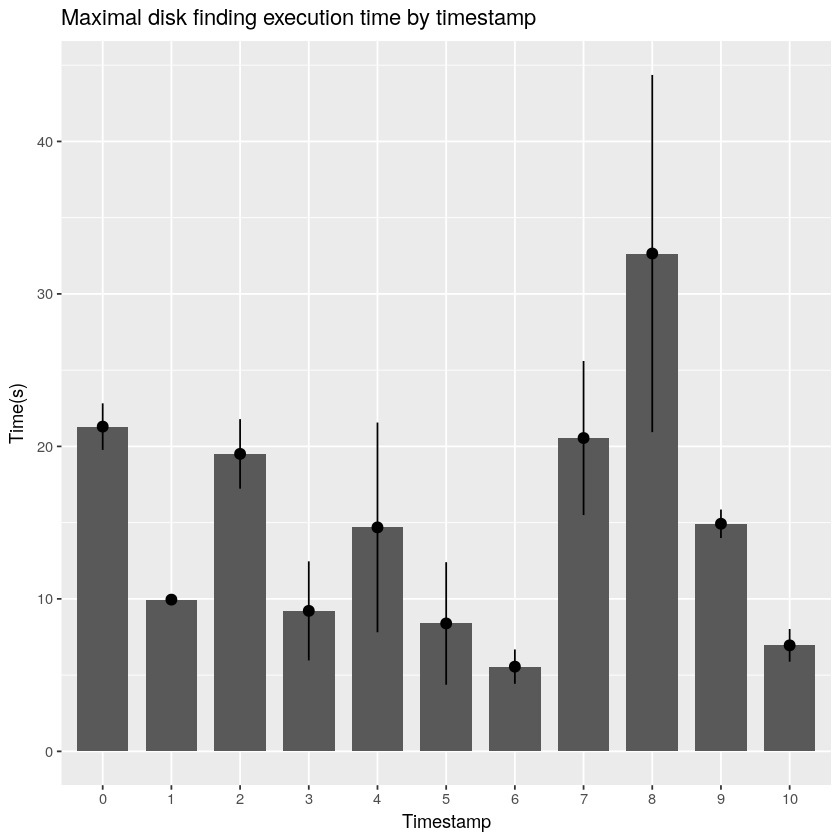

In [17]:
data$Perf = data$Load / data$Time
times   = data[,c("Timestamp", "Time")]
times_s = summaryBy(data=times, Time ~ Timestamp, FUN = function(x){ c(m=mean(x),s=sd(x))})
times_s

title = "Maximal disk finding execution time by timestamp"
g = ggplot(data=times_s, aes(x=factor(Timestamp), y=Time.m, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x="Timestamp") 
plot(g)

Timestamp,Perf.m,Perf.s
0,624.3606,46.24313
1,1354.9899,31.14623
2,707.1122,85.99299
3,1705.1774,698.85500
4,1183.1263,657.33646
5,1907.5361,729.72230
6,2572.9254,715.05895
7,697.8559,188.92176
8,470.8510,193.96716
9,907.5938,55.94281


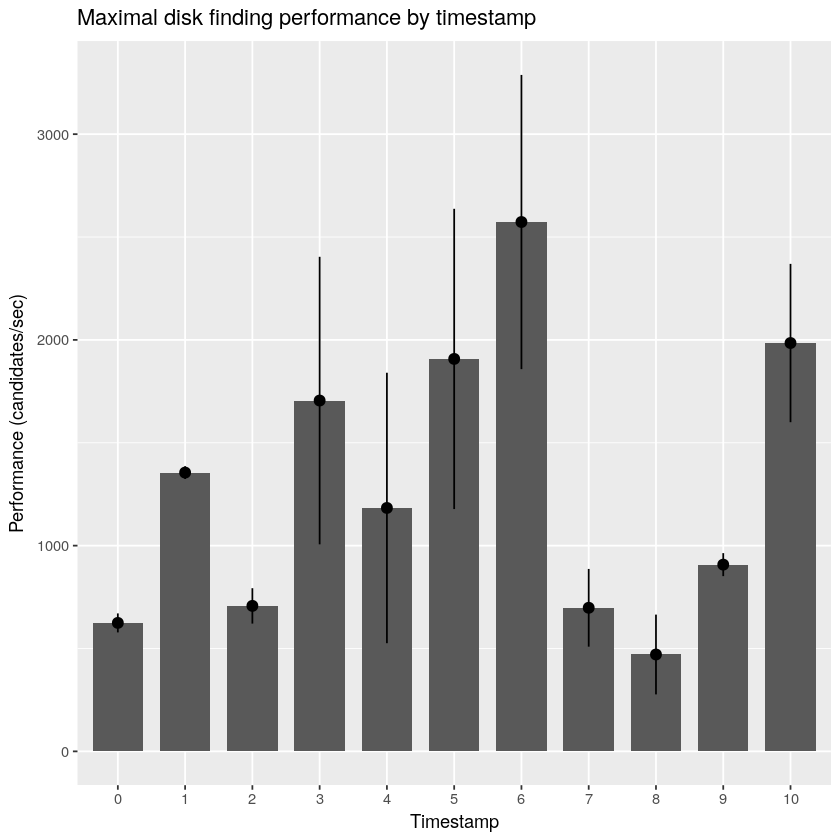

In [18]:
perfs   = data[,c("Timestamp", "Perf")]
perfs_s = summaryBy(data=perfs, Perf ~ Timestamp, FUN = function(x){ c(m=mean(x),s=sd(x))})
perfs_s

title = "Maximal disk finding performance by timestamp"
g = ggplot(data=perfs_s, aes(x=factor(Timestamp), y=Perf.m, ymin = Perf.m-Perf.s, ymax = Perf.m+Perf.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Performance (candidates/sec)", x="Timestamp") 
plot(g)